In [1]:
from qiskit import *
%matplotlib inline
import matplotlib.pyplot as plt

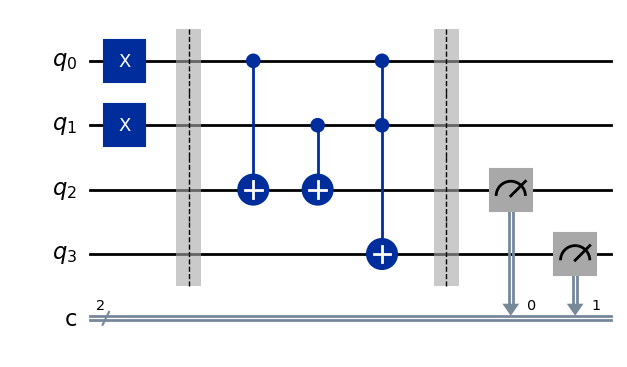

In [2]:
circuit = QuantumCircuit(4, 2)
circuit.x(0) # initalize input A
circuit.x(1) # initalize input B
circuit.barrier()

circuit.cx(0, 2)
circuit.cx(1, 2)
circuit.ccx(0, 1, 3)

circuit.barrier()
circuit.measure(2, 0) # measure SUM
circuit.measure(3, 1) # measure CARRY-OUT
circuit.draw(output='mpl')
plt.show()

In [3]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1).result()
counts = result.get_counts()
print(f'SUM is {list(counts.keys())[0][1]}')
print(f'CARRY-OUT is {list(counts.keys())[0][0]}')

SUM is 0
CARRY-OUT is 1
